<a href="https://colab.research.google.com/github/ghazala-rabbani/ghazala3007/blob/main/XGBoost_Disease_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# disease diagnosis using xgboost -


import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load the dataset (Pima Indians Diabetes Dataset as an example)
# You can replace this with your own medical dataset.
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Load into a Pandas DataFrame
data = pd.read_csv(url, header=None, names=columns)




In [ ]:
# Preview the data
#print(data.head())
#print(data)
pd.set_option('display.expand_frame_repr', False)
print(data.head(30))


    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0             6      148             72             35        0  33.6                     0.627   50        1
1             1       85             66             29        0  26.6                     0.351   31        0
2             8      183             64              0        0  23.3                     0.672   32        1
3             1       89             66             23       94  28.1                     0.167   21        0
4             0      137             40             35      168  43.1                     2.288   33        1
5             5      116             74              0        0  25.6                     0.201   30        0
6             3       78             50             32       88  31.0                     0.248   26        1
7            10      115              0              0        0  35.3                     0.134   29        0
8         

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
# Split the features and target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target (Outcome: 0 = No diabetes, 1 = Diabetes)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Setting up RandomForest and XGBoost

In [ ]:
# Setting up randomForest
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Model Predictions:", rf_y_pred[:10])
print("Random Forest Model Prediction Probabilities:", rf_y_pred_proba[:10])

accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy:", accuracy)

Random Forest Model Predictions: [0 0 0 0 0 1 0 1 1 1]
Random Forest Model Prediction Probabilities: [0.31 0.32 0.17 0.25 0.39 0.53 0.01 0.73 0.62 0.55]
Accuracy: 0.7207792207792207


In [ ]:
# Setting up randomForest
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Model Predictions:", rf_y_pred[:10])
print("Random Forest Model Prediction Probabilities:", rf_y_pred_proba[:10])

accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy:", accuracy)

Random Forest Model Predictions: [0 0 0 0 0 1 0 1 1 1]
Random Forest Model Prediction Probabilities: [0.31 0.32 0.17 0.25 0.39 0.53 0.01 0.73 0.62 0.55]
Accuracy: 0.7207792207792207


In [ ]:
# Setting up xgboost
model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=50,max_depth=3,learning_rate=0.1, random_state=42)

# Train the model
model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
print (X_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age
668            6       98             58             33      190  34.0                     0.430   43
324            2      112             75             32        0  35.7                     0.148   21
624            2      108             64              0        0  30.8                     0.158   21
690            8      107             80              0        0  24.6                     0.856   34
473            7      136             90              0        0  29.9                     0.210   50
..           ...      ...            ...            ...      ...   ...                       ...  ...
355            9      165             88              0        0  30.4                     0.302   49
534            1       77             56             30       56  33.3                     1.251   24
344            8       95             72              0        0  36.8            

In [ ]:
# Make predictions (from the previous cell to ensure all necessary variables are available)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# probability of class 0 (e.g., No diabetes)
# probability of class 1 (e.g., Diabetes)

print(y_pred)
print(y_pred_proba)

[0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]
[0.4063859  0.14296652 0.1325573  0.18744817 0.4181236  0.6005888
 0.01324667 0.75979686 0.63194877 0.616409   0.28053474 0.8787361
 0.2929053  0.34014907 0.03226642 0.42409495 0.13961098 0.02668366
 0.63015616 0.43956724 0.33405247 0.08979018 0.34515184 0.11787201
 0.45746744 0.93010193 0.05570386 0.02455231 0.0521908  0.16578208
 0.8265633  0.7615178  0.7963405  0.8865423  0.7553053  0.63805634
 0.90680987 0.49050564 0.4997978  0.7917174  0.04024523 0.41437837
 0.68645656 0.43008083 0.01959229 0.68586844 0.63134015 0.12082936
 0.22259495 0.9284525  0.01608806 0.7557805  0.8116072  0.15827928
 0.05082792 0.02726138 0.62195987 0.02566106 0.21655495 0.8347428
 0.6580713  0.34533

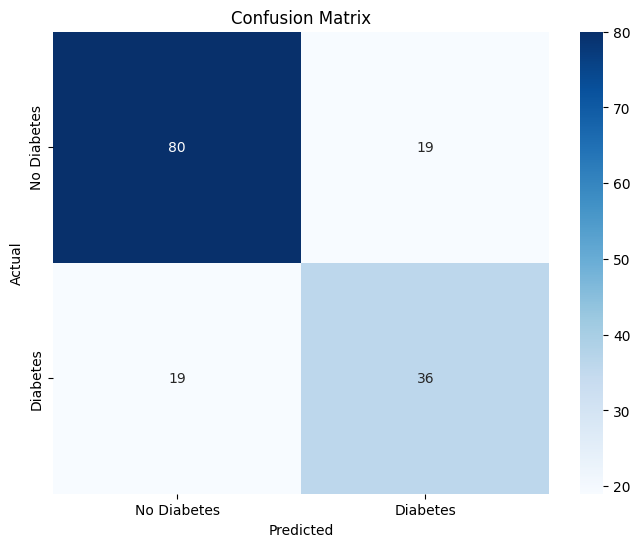

In [ ]:
# Make predictions (from the previous cell to ensure all necessary variables are available)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Draw the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]



Accuracy: 0.7532467532467533

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


F1-score: 0.6545


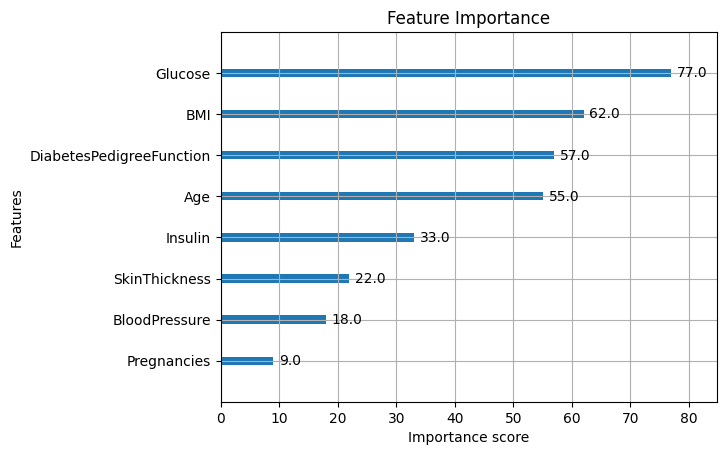

In [ ]:
# Evaluate accuracy
# Accuracy=TP+TN/+FP+FN+TP+TN​

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute ROC AUC Score
#roc_auc = roc_auc_score(y_test, y_pred_proba)
#print("ROC AUC Score:", roc_auc)

# Calculate F1-score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"\nF1-score: {f1:.4f}")

# Plot feature importance
import matplotlib.pyplot as plt

xgb.plot_importance(model, importance_type="weight")
plt.title("Feature Importance")
plt.show()

## Summary:

### Data Analysis Key Findings

*   The "Pima Indians Diabetes Dataset" was successfully loaded into a Pandas DataFrame named `data` from the specified URL: `https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv`.
*   The dataset contains 768 entries (rows) and 9 columns: `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`, and `Outcome`.
*   All columns have appropriate numerical data types; specifically, `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `Age`, and `Outcome` are `int64`, while `BMI` and `DiabetesPedigreeFunction` are `float64`.
*   There are no missing values in any of the columns, as indicated by all columns showing 768 non-null entries.

### Insights or Next Steps

*   The dataset is clean regarding missing values, which streamlines the initial data preparation phase.
*   The next step should involve exploratory data analysis to understand the distribution of variables, identify potential outliers or inconsistencies (e.g., zero values for `BloodPressure` or `Glucose`), and analyze the relationships between features and the `Outcome` variable.
